In [1]:
import pandas as pd
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
from time import time
import Filter
import ProjectPackage.DataExtraction as de
import ProjectPackage.Kinematic as km
from ProjectPackage import Cut

In [14]:
from collections import Counter

In [2]:
data_folder = 'D:/Data_muons/dimuonData_LHC18mMC'
run_number = 290350

In [3]:
gen_events = de.read_root_file(data_folder, run_number, branch='genTree')
events = de.read_root_file(data_folder, run_number)

Size of the data file : 6.83 Mo.
Extraction took 1.0 s.
Number of events : 40000.
Size of the data file : 6.83 Mo.
Extraction took 1.0 s.
Number of events : 40000.


In [4]:
df_JPsi = de.MC_muons_from_JPsi(gen_events, events)

In [51]:
N_JPsi_generated =  Counter(gen_events['Muon']['GenMotherPDGCode'][:, 0])[443]

Counter({100443: 16593, 443: 33407})

In [5]:
df_JPsi= Cut.more_than_one_muon(df_JPsi)

In [6]:
df_JPsi

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
4     0         32.639103  0.898272 -2.246393 -32.549145      -1  4.356109   
      1         12.560914  1.282863  0.857640 -12.465317       1  7.241020   
8     0         44.965744 -4.125182  1.447606 -44.752590      -1  5.587151   
      1          8.473455  0.162316 -0.625763  -8.448098       1  4.269989   
15    0         17.779661  0.511636 -1.937725 -17.666031      -1  6.330056   
...                   ...       ...       ...        ...     ...       ...   
39988 1         20.137711 -0.383547 -0.664144 -20.122824      -1  2.173791   
39989 0         29.315990  0.276409  1.644271 -29.268347       1  3.361345   
      1         14.165579 -1.182077 -1.001817 -14.080182      -1  6.416943   
39997 0          9.412484 -0.564705  0.943806  -9.347408      -1  6.987274   
      1         21.762341  0.950925 -1.703994 -21.674419       1  5.081514   

                     xDCA       yDCA       zDCA  matchedTrgThreshold  \
entry subentry                                                         
4     0         -0.438410   3.873013  10.617554                    2   
      1         -3.917211   2.590415  10.617554                    2   
8     0          2.080722  -0.382406  -2.787759                    3   
      1         -4.809096  -6.479955  -2.787759                    0   
15    0          3.012422   0.058989  -7.586966                    2   
...                   ...        ...        ...                  ...   
39988 1         -0.507162   7.567567  -1.243141                    2   
39989 0         -0.832773  -0.049870   8.092486                    3   
      1          3.565193   4.464727   8.092486                    2   
39997 0         19.466990 -11.121731   0.967598                    2   
      1          2.113030  -1.407254   0.967598                    2   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk  MCLabel  MCPDGCode  \
entry subentry                                                                  
4     0                  1023    1074414591        672767        2         13   
      1                   511    3224669183       3443711        1        -13   
8     0                   991    1080415487       6661119        2         13   
      1                  1023    1073741824         23552        1        -13   
15    0                  1023    1074353271        606071        2         13   
...                       ...           ...           ...      ...        ...   
39988 1                  1021    1077751807       4009983        2         13   
39989 0                   927    3221621759        396287        1        -13   
      1                  1023    1080177663       6435839        2         13   
39997 0                   991    1080435711       6693887        2         13   
      1                  1023    3221968127        739327        1        -13   

                GenMotherPDGCode  
entry subentry                    
4     0                      443  
      1                      443  
8     0                      443  
      1                      443  
15    0                      443  
...                          ...  
39988 1                      443  
39989 0                      443  
      1                      443  
39997 0                      443  
      1                      443  

[14040 rows x 16 columns]

In [7]:
df_MC_di_muons = de.di_muons_dataframe(df_JPsi)

100%|██████████| 7020/7020 [00:07<00:00, 927.46it/s] 


Execution time : 9.67


In [8]:
df_MC_di_muons['M_inv'] = df_MC_di_muons.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)
df_MC_di_muons['p_T'] = df_MC_di_muons.apply(lambda x: km.p_T_df(x['P1'], x['P2']), axis=1)
df_MC_di_muons['y'] = df_MC_di_muons.apply(lambda x: km.y(x['E'], x['P1'][-1] + x['P2'][-1]), axis=1)

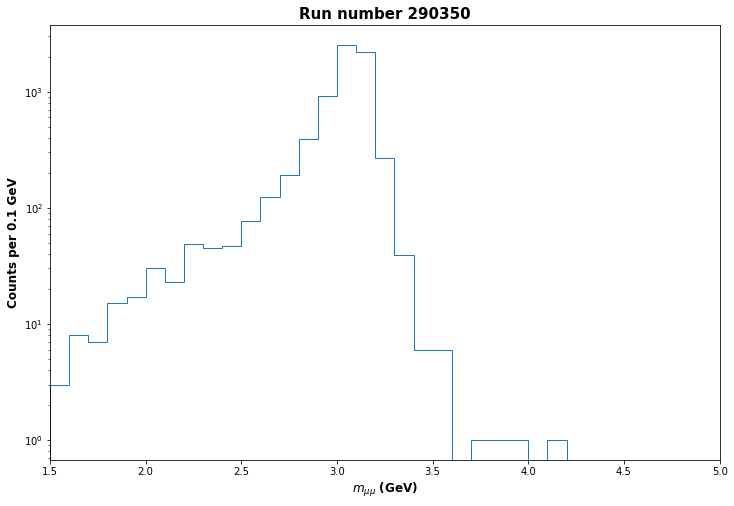

In [9]:
h = Filter.plot_M_inv(df_MC_di_muons['M_inv'], run_number)

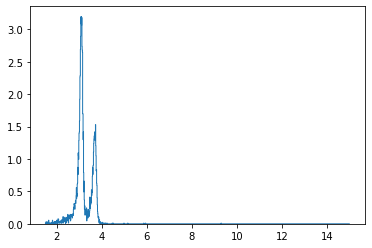

In [24]:
width = 0.01
m_min, m_max = 1.5, 15
N = int((m_max - m_min) / width + 1)

h = plt.hist(df_MC_di_muons['M_inv'], bins = np.linspace(1.5, 15, N), histtype='step', align='mid', density=True)

In [57]:
df_MC_di_muons

,,P1,P2,E1,E2,E,M_inv,p_T,y
Event id,Muon id,,,,,,,,
2,"(0, 1)","[0.48838058, -1.549988, -23.442211]","[-2.344716, -1.1761321, -17.190815]",23.498711,17.390120,40.888832,3.151287,3.298138,-2.882104
9,"(0, 1)","[-0.7505853, 1.4225478, -15.246875]","[-2.197666, -1.5261581, -25.260548]",15.331842,25.402075,40.733917,3.106514,2.950071,-2.941231
17,"(0, 1)","[0.97964764, 0.5533636, -29.717632]","[-0.3067992, 5.672762, -61.932674]",29.739111,62.192780,91.931892,3.525000,6.262377,-3.239990
26,"(0, 1)","[-0.00038822155, 1.7020462, -49.012337]","[2.729288, 0.19492476, -69.75613]",49.041996,69.809853,118.851852,2.953247,3.323461,-3.977455
30,"(0, 1)","[-1.7471068, -0.8894406, -39.629425]","[-0.01249517, 1.6643828, -36.21362]",39.678032,36.252003,75.930038,3.075837,1.922689,-3.732172
...,...,...,...,...,...,...,...,...,...
49984,"(0, 1)","[0.107524626, 2.3083713, -21.120495]","[-0.17050265, -0.95133424, -14.561279]",21.246801,14.593701,35.840504,3.075919,1.358498,-3.055281
49987,"(0, 1)","[-0.92320424, 1.0444614, -12.145874]","[-1.239963, -3.183386, -44.196224]",12.226064,44.328194,56.554256,3.825260,3.042087,-3.138447
49988,"(0, 1)","[-0.94348377, 1.095878, -11.894768]","[0.49313825, -1.3783118, -31.119955]",11.982812,31.154547,43.137360,3.198036,0.531582,-3.277329


In [59]:
rap_min = 2.5
rap_max = 4

pt_min = 0
pt_max = 8

rap_bin = np.linspace(rap_min, rap_max, 10)
pt_bin = np.linspace(pt_min, pt_max, 9)

(array([1263., 2334., 1889., 1350.,  828.,  519.,  308.,  166.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

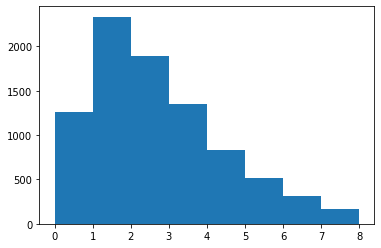

In [60]:
plt.hist(df_MC_di_muons['p_T'], bins=pt_bin)

(array([ 347.,  914., 1312., 1415., 1411., 1287., 1085.,  742.,  400.]),
 array([2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
        3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ]),
 <BarContainer object of 9 artists>)

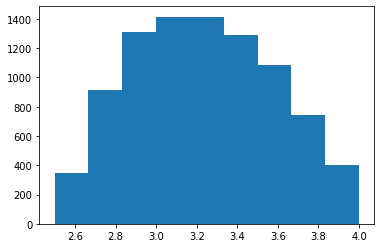

In [61]:
plt.hist(np.abs(df_MC_di_muons['y']), bins=rap_bin)

In [63]:
df_JPsi

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
2     0         23.498711  0.488381 -1.549988 -23.442211      -1  4.002942   
      1         17.390120 -2.344716 -1.176132 -17.190815       1  8.878577   
3     0         30.201040  0.073157  1.652825 -30.155504       1  3.216525   
4     0         45.413754 -3.071838  3.019731 -45.208881      -1  5.554925   
5     0         16.946646  0.377813 -1.551373 -16.870926      -1  5.389262   
...                   ...       ...       ...        ...     ...       ...   
49992 1          7.285460 -0.159986 -0.690566  -7.250123      -1  5.615806   
49993 0         48.442661  1.855868  1.510623 -48.383408       1  2.834220   
49996 0         46.938534 -2.178899 -1.055878 -46.875923       1  2.865243   
      1         38.480614  0.760645  1.353687 -38.449127      -1  2.312712   
49997 0          9.842753  0.981072 -0.096803  -9.792689      -1  5.559794   

                     xDCA      yDCA       zDCA  matchedTrgThreshold  \
entry subentry                                                        
2     0         -0.846229 -0.185634  10.481424                    2   
      1          5.866361 -1.477651  10.481424                    3   
3     0         -0.614339  0.010723   4.917283                    3   
4     0          2.691869 -1.404004   4.215640                    3   
5     0          1.718890 -1.006364   4.095264                    3   
...                   ...       ...        ...                  ...   
49992 1         13.487918 -1.746244  -2.902555                    2   
49993 0          3.282735  0.148156  -2.240387                    3   
49996 0         -0.473000 -1.893596  -9.630126                    2   
      1         -2.599837  1.752227  -9.630126                    2   
49997 0         10.416901  2.100573  -5.321918                    2   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk  MCLabel  MCPDGCode  \
entry subentry                                                                  
2     0                  1023    1074447103        705279        2         13   
      1                  1023    3228740607       7515135        1        -13   
3     0                   927    2147898623        396287        1        -13   
4     0                  1023    1079923967       6169599        2         13   
5     0                  1023    1074380799        638975        2         13   
...                       ...           ...           ...      ...        ...   
49992 1                  1021    1078147071       4405247        2         13   
49993 0                  1023    3222243327       1017855        1        -13   
49996 0                  1005    3226658047         25855        1        -13   
      1                  1023    1074746623        985087        2         13   
49997 0                   943    1075925469       2183645        2         13   

                GenMotherPDGCode  
entry subentry                    
2     0                    443.0  
      1                    443.0  
3     0                    443.0  
4     0                    443.0  
5     0                    443.0  
...                          ...  
49992 1                    443.0  
49993 0                    443.0  
49996 0                    443.0  
      1                    443.0  
49997 0                    443.0  

[36883 rows x 16 columns]

In [64]:
events = Filter.cut_events(events)


Cut nMuons [...] 
 
This cut rejects 73.27 % of the statistics

Cut CMUL [...] 
 
This cut rejects 18.76 % of the statistics

Cut zVtx [...] 
 
This cut rejects 3.25 % of the statistics


In [65]:
df_JPsi = de.MC_muons_from_JPsi(gen_events, events)

In [66]:
df_JPsi

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
2     0         10.719228 -1.003180  0.136138 -10.670791       1  5.282767   
      1         51.090294  2.801551 -0.029622 -51.013306      -1  3.107426   
3     0         29.739111  0.979648  0.553364 -29.717632       1  2.172865   
      1         62.192780 -0.306799  5.672762 -61.932674      -1  5.290217   
4     0         39.678032 -1.747107 -0.889441 -39.629425      -1  2.852030   
...                   ...       ...       ...        ...     ...       ...   
10503 1          7.285460 -0.159986 -0.690566  -7.250123      -1  5.615806   
10504 0         46.938534 -2.178899 -1.055878 -46.875923       1  2.865243   
      1         38.480614  0.760645  1.353687 -38.449127      -1  2.312712   
10505 0         15.705569 -0.910367 -0.438091 -15.672685      -1  3.564234   
      1         57.897934  0.045639  3.358790 -57.800312       1  3.321338   

                     xDCA      yDCA      zDCA  matchedTrgThreshold  \
entry subentry                                                       
2     0         -3.709304 -5.265104 -6.227890                    2   
      1          0.376798 -1.192809 -6.227890                    2   
3     0          5.061636 -0.153052  1.478772                    2   
      1         -0.514271  0.871412  1.478772                    3   
4     0          4.586931 -0.229292  2.568538                    3   
...                   ...       ...       ...                  ...   
10503 1         13.487918 -1.746244 -2.902555                    2   
10504 0         -0.473000 -1.893596 -9.630126                    2   
      1         -2.599837  1.752227 -9.630126                    2   
10505 0          0.008076 -6.558584 -9.264464                    2   
      1         -0.274137 -0.597027 -9.264464                    3   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk  MCLabel  MCPDGCode  \
entry subentry                                                                  
2     0                   991    3227426815       6201343        1        -13   
      1                  1007    1075369215       1606655        2         13   
3     0                  1023    3222243327       1017855        1        -13   
      1                   511    2151718911       4267775        2         13   
4     0                  1005    2152846591       5352447        2         13   
...                       ...           ...           ...      ...        ...   
10503 1                  1021    1078147071       4405247        2         13   
10504 0                  1005    3226658047         25855        1        -13   
      1                  1023    1074746623        985087        2         13   
10505 0                   943    1079061503       5319679        2         13   
      1                   927    3221621759        396287        1        -13   

                GenMotherPDGCode  
entry subentry                    
2     0                    443.0  
      1                    443.0  
3     0                    443.0  
      1                    443.0  
4     0                    443.0  
...                          ...  
10503 1                    443.0  
10504 0                    443.0  
      1                    443.0  
10505 0                    443.0  
      1                    443.0  

[14036 rows x 16 columns]

In [10]:
df_JPsi_f = Filter.cut_tracks(df_JPsi)


Cut threshold [...] 
This cut rejects 44.66 % of the statistics

Cut eta [...] 
This cut rejects 8.7 % of the statistics

Cut pDCA [...] 
 
This cut rejects 6.37 % of the statistics
Max number of possible muons pairs : 3321


In [68]:
df_JPsi_f

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
7     0         22.498255 -1.451546 -0.491136 -22.445761       1  3.912310   
      1         30.130026  0.492095  1.976868 -30.060890      -1  3.886142   
9     0         20.324820 -0.783968 -0.365113 -20.306137      -1  2.457329   
      1         41.948536  2.340700 -2.749631 -41.792690       1  4.945306   
13    0         41.678577 -1.675286 -1.165138 -41.628460      -1  2.763079   
...                   ...       ...       ...        ...     ...       ...   
10498 1         23.908455 -2.456419  1.583935 -23.728889      -1  6.945457   
10502 0         12.226064 -0.923204  1.044461 -12.145874      -1  6.541676   
      1         44.328194 -1.239963 -3.183386 -44.196224       1  4.362183   
10504 0         46.938534 -2.178899 -1.055878 -46.875923       1  2.865243   
      1         38.480614  0.760645  1.353687 -38.449127      -1  2.312712   

                    xDCA      yDCA      zDCA  matchedTrgThreshold  ...  \
entry subentry                                                     ...   
7     0         1.990693  4.311614 -3.687359                    2  ...   
      1        -1.066869  1.094012 -3.687359                    2  ...   
9     0         5.440750 -7.650695  2.036510                    2  ...   
      1        -2.181740 -0.594950  2.036510                    2  ...   
13    0        -2.289929  3.277928 -1.101494                    2  ...   
...                  ...       ...       ...                  ...  ...   
10498 1        -1.292333  4.276529 -3.059011                    2  ...   
10502 0         1.527512  1.139989 -2.120121                    2  ...   
      1         0.510287  0.269745 -2.120121                    2  ...   
10504 0        -0.473000 -1.893596 -9.630126                    2  ...   
      1        -2.599837  1.752227 -9.630126                    2  ...   

                MTRHitMapTrg  MTRHitMapTrk  MCLabel  MCPDGCode  \
entry subentry                                                   
7     0           3227297791       6072319        1        -13   
      1           1074091263        329727        2         13   
9     0           1079137535       5385215        2         13   
      1           3222685559       1460087        1        -13   
13    0           1078383871       4631295        2         13   
...                      ...           ...      ...        ...   
10498 1           1080415487       6661119        2         13   
10502 0           1079923967       6169343        2         13   
      1           3225791487       4566015        1        -13   
10504 0           3226658047         25855        1        -13   
      1           1074746623        985087        2         13   

                GenMotherPDGCode       eta          P        DCA        pDCA  \
entry subentry                                                                 
7     0                    443.0 -3.378588  20.098008   6.012444  120.838151   
      1                    443.0 -3.385945  27.729840   3.991452  110.682325   
9     0                    443.0 -3.849758  17.324545   9.606366  166.425923   
      1                    443.0 -3.143744  39.548401   3.043243  120.355409   
13    0                    443.0 -3.709278  38.678445   4.147514  160.419412   
...                          ...       ...        ...        ...         ...   
10498 1                    443.0 -2.791065  21.508221   5.414460  116.455395   
10502 0                    443.0 -2.861244   9.825607   2.850927   28.012084   
      1                    443.0 -3.254704  41.928069   2.197287   92.128002   
10504 0                    443.0 -3.657032  43.938413   9.825923  431.735465   
      1                    443.0 -3.902859  35.480468  10.127625  359.332863   

                  s_pxDCA  
entry subentry             
7     0         56.427283  
      1         57.475495  
9     0         82.901561  
      

In [11]:
df_MC_di_muons_f = de.di_muons_dataframe(df_JPsi_f)

100%|██████████| 3321/3321 [00:03<00:00, 1022.69it/s]

Execution time : 4.47


In [12]:
df_MC_di_muons_f['M_inv'] = df_MC_di_muons.apply(lambda x: km.inv_mass(x['E1'], x['E2'], x['P1'], x['P2']), axis=1)

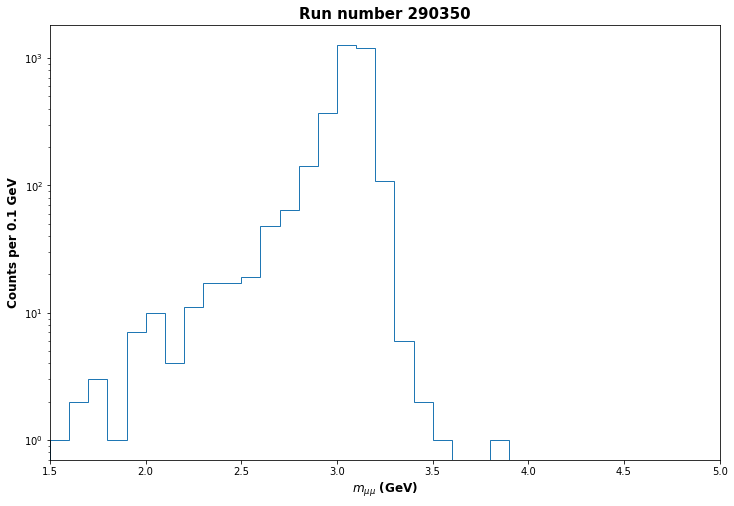

In [13]:
h = Filter.plot_M_inv(df_MC_di_muons_f['M_inv'], run_number)

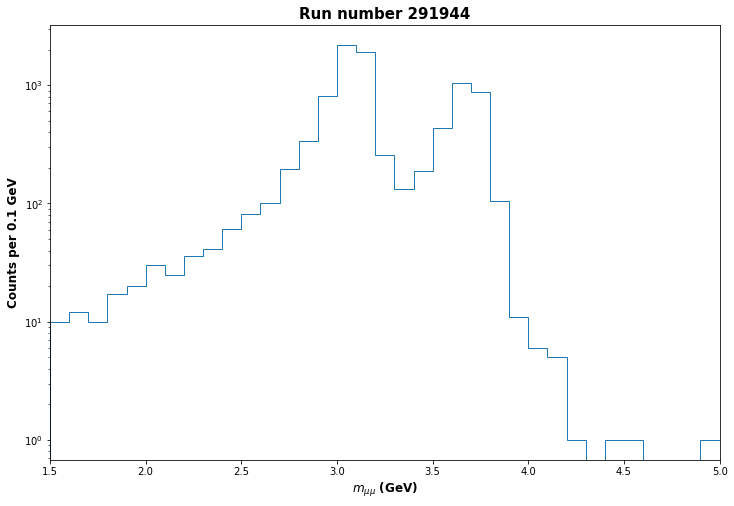

In [77]:
h = Filter.plot_M_inv(df_MC_di_muons['M_inv'], run_number)

In [78]:
df_JPsi

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
2     0         10.719228 -1.003180  0.136138 -10.670791       1  5.282767   
      1         51.090294  2.801551 -0.029622 -51.013306      -1  3.107426   
3     0         29.739111  0.979648  0.553364 -29.717632       1  2.172865   
      1         62.192780 -0.306799  5.672762 -61.932674      -1  5.290217   
4     0         39.678032 -1.747107 -0.889441 -39.629425      -1  2.852030   
...                   ...       ...       ...        ...     ...       ...   
10503 1          7.285460 -0.159986 -0.690566  -7.250123      -1  5.615806   
10504 0         46.938534 -2.178899 -1.055878 -46.875923       1  2.865243   
      1         38.480614  0.760645  1.353687 -38.449127      -1  2.312712   
10505 0         15.705569 -0.910367 -0.438091 -15.672685      -1  3.564234   
      1         57.897934  0.045639  3.358790 -57.800312       1  3.321338   

                     xDCA      yDCA      zDCA  matchedTrgThreshold  \
entry subentry                                                       
2     0         -3.709304 -5.265104 -6.227890                    2   
      1          0.376798 -1.192809 -6.227890                    2   
3     0          5.061636 -0.153052  1.478772                    2   
      1         -0.514271  0.871412  1.478772                    3   
4     0          4.586931 -0.229292  2.568538                    3   
...                   ...       ...       ...                  ...   
10503 1         13.487918 -1.746244 -2.902555                    2   
10504 0         -0.473000 -1.893596 -9.630126                    2   
      1         -2.599837  1.752227 -9.630126                    2   
10505 0          0.008076 -6.558584 -9.264464                    2   
      1         -0.274137 -0.597027 -9.264464                    3   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk  MCLabel  MCPDGCode  \
entry subentry                                                                  
2     0                   991    3227426815       6201343        1        -13   
      1                  1007    1075369215       1606655        2         13   
3     0                  1023    3222243327       1017855        1        -13   
      1                   511    2151718911       4267775        2         13   
4     0                  1005    2152846591       5352447        2         13   
...                       ...           ...           ...      ...        ...   
10503 1                  1021    1078147071       4405247        2         13   
10504 0                  1005    3226658047         25855        1        -13   
      1                  1023    1074746623        985087        2         13   
10505 0                   943    1079061503       5319679        2         13   
      1                   927    3221621759        396287        1        -13   

                GenMotherPDGCode  
entry subentry                    
2     0                    443.0  
      1                    443.0  
3     0                    443.0  
      1                    443.0  
4     0                    443.0  
...                          ...  
10503 1                    443.0  
10504 0                    443.0  
      1                    443.0  
10505 0                    443.0  
      1                    443.0  

[14036 rows x 16 columns]

In [80]:
gen_events['Muon'][2].to_list()

[{'GenE': 16.9881534576416,
  'GenPx': -2.2790162563323975,
  'GenPy': -1.1857889890670776,
  'GenPz': -16.792444229125977,
  'GenLabel': 1,
  'GenMotherPDGCode': 443},
 {'GenE': 23.36610984802246,
  'GenPx': 0.48184284567832947,
  'GenPy': -1.56119966506958,
  'GenPz': -23.308677673339844,
  'GenLabel': 2,
  'GenMotherPDGCode': 443}]

In [83]:
ak.to_pandas(gen_events['Muon'])

GenE     GenPx     GenPy      GenPz  GenLabel  \
entry subentry                                                       
0     0          4.670792 -1.263611  0.183771  -4.491620         1   
      1         17.771795  2.310422  0.000437 -17.620655         2   
1     0         11.439411  2.532304 -0.132445 -11.154320         1   
      1         22.576473  0.738930 -0.901150 -22.546127         2   
2     0         16.988153 -2.279016 -1.185789 -16.792444         1   
...                   ...       ...       ...        ...       ...   
49997 1          9.841384  0.977022 -0.107969  -9.791600         2   
49998 0         20.012403 -1.068127  1.228619 -19.945795         1   
      1          2.630139  0.108675 -0.914873  -2.461233         2   
49999 0         58.068161 -0.019710  3.398420 -57.968529         1   
      1         15.795700 -0.910794 -0.406150 -15.763835         2   

                GenMotherPDGCode  
entry subentry                    
0     0                   100443  
      1                   100443  
1     0                      443  
      1                      443  
2     0                      443  
...                          ...  
49997 1                   100443  
49998 0                      443  
      1                      443  
49999 0                      443  
      1                      443  

[100000 rows x 6 columns]

In [85]:
id_JPsi = 443

df_gen = ak.to_pandas(gen_events['Muon'])
df_events = ak.to_pandas(events['Muon'])

# we now have to add the information on the mother particle for each tracks
C = Counter(df_events.index.get_level_values(0))



In [86]:
PDGC_list = []
for k, val in C.items():
    # for each track, we look at the corresponding event in the dataframe of the generated events
    id_gen = df_gen.iloc[k]['GenMotherPDGCode']
    for _ in range(val):
        PDGC_list.append(id_gen)

df_events['GenMotherPDGCode'] = PDGC_list

In [87]:
df_events

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         15.331842 -0.750585  1.422548 -15.246875      -1  6.005761   
      1         25.402075 -2.197666 -1.526158 -25.260548       1  5.985357   
1     0         18.248934 -0.205411  1.275412 -18.202845      -1  4.091113   
      1         21.470314  2.963206  0.560311 -21.257204       1  8.074436   
2     0         10.719228 -1.003180  0.136138 -10.670791       1  5.282767   
...                   ...       ...       ...        ...     ...       ...   
10503 1          7.285460 -0.159986 -0.690566  -7.250123      -1  5.615806   
10504 0         46.938534 -2.178899 -1.055878 -46.875923       1  2.865243   
      1         38.480614  0.760645  1.353687 -38.449127      -1  2.312712   
10505 0         15.705569 -0.910367 -0.438091 -15.672685      -1  3.564234   
      1         57.897934  0.045639  3.358790 -57.800312       1  3.321338   

                     xDCA      yDCA      zDCA  matchedTrgThreshold  \
entry subentry                                                       
0     0         -3.597257  0.952132 -2.086756                    2   
      1          0.344791 -0.963024 -2.086756                    3   
1     0         -1.589270  1.651826  1.285627                    2   
      1          1.843531  2.199682  1.285627                    3   
2     0         -3.709304 -5.265104 -6.227890                    2   
...                   ...       ...       ...                  ...   
10503 1         13.487918 -1.746244 -2.902555                    2   
10504 0         -0.473000 -1.893596 -9.630126                    2   
      1         -2.599837  1.752227 -9.630126                    2   
10505 0          0.008076 -6.558584 -9.264464                    2   
      1         -0.274137 -0.597027 -9.264464                    3   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk  MCLabel  MCPDGCode  \
entry subentry                                                                  
0     0                  1023    1079399679       5645311        2         13   
      1                  1023    1080306431       6564607        1        -13   
1     0                  1023    1077912575       4170751        2         13   
      1                   751    2151221247       3737599        1        -13   
2     0                   991    3227426815       6201343        1        -13   
...                       ...           ...           ...      ...        ...   
10503 1                  1021    1078147071       4405247        2         13   
10504 0                  1005    3226658047         25855        1        -13   
      1                  1023    1074746623        985087        2         13   
10505 0                   943    1079061503       5319679        2         13   
      1                   927    3221621759        396287        1        -13   

                GenMotherPDGCode  
entry subentry                    
0     0                 100443.0  
      1                 100443.0  
1     0                 100443.0  
      1                 100443.0  
2     0                    443.0  
...                          ...  
10503 1                    443.0  
10504 0                    443.0  
      1                    443.0  
10505 0                    443.0  
      1                    443.0  

[21012 rows x 16 columns]